## KNN
prédire à quel groupe appartient un nouvel objet cible en le comparant à des objets identifiés. Les objets identifiés ou étiquetés sont appelés ensemble d'apprentissage.

## Principe
Trouvez les k objets les plus proches de l'objet cible en utilisant une mesure de distance. Ensuite, ces k voisins les plus proches votent sur l'identité de l'objet cible.


Par exemple, si k=10, nous trouvons les 10 objets les plus proches dans notre ensemble d'apprentissage. Si 6 d'entre eux sont des pommes, trois sont des poires et un est une orange, alors nous prédisons que notre objet cible est une pomme. <br/><br/>

In [4]:
import numpy as np
import pandas as pd

In [5]:
train = pd.read_csv('./iris.data')
train.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


On renomme les colonnes de l'ensemble d'entraînement et ajoutez une colonne pour la distance.

In [6]:
train = train.drop('id', 1)
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
train.rename(columns = {cols[0]:0, cols[1]:1, cols[2]:2, cols[3]:3}, inplace=True)
train['distance'] = 9999
train.head()

,0,1,2,3,species,distance
0,5.1,3.5,1.4,0.2,Iris-setosa,9999
1,4.9,3.0,1.4,0.2,Iris-setosa,9999
2,4.7,3.2,1.3,0.2,Iris-setosa,9999
3,4.6,3.1,1.5,0.2,Iris-setosa,9999
4,5.0,3.6,1.4,0.2,Iris-setosa,9999


créons un objet non identifié, puis nous essaierons de prédire son type à l'aide de knn.

In [7]:
target = pd.Series([7.0, 3.1, 5.6, 1.9])
target

0    7.0
1    3.1
2    5.6
3    1.9
dtype: float64

### Distance

Il existe plusieurs manières de mesurer la distance entre l'objet cible et les objets qu'il entourne. 
Nous utiliserons la distance euclidienne,nous calculons la distance de chaque instance d'entraînement par rapport à la cible.

<br/>

In [8]:
train['distance'] = ((train.loc[:,0]-target[0])**2 + (train.loc[:,1]-target[1])**2 +\
                     (train.loc[:,2]-target[2])**2 + (train.loc[:,3]-target[3])**2) ** 0.5
train.loc[::10]

,0,1,2,3,species,distance
0,5.1,3.5,1.4,0.2,Iris-setosa,4.929503
10,5.4,3.7,1.5,0.2,Iris-setosa,4.756049
20,5.4,3.4,1.7,0.2,Iris-setosa,4.555217
30,4.8,3.1,1.6,0.2,Iris-setosa,4.871345
40,5.0,3.5,1.3,0.3,Iris-setosa,5.020956
50,7.0,3.2,4.7,1.4,Iris-versicolor,1.034408
60,5.0,2.0,3.5,1.0,Iris-versicolor,3.229551
70,5.9,3.2,4.8,1.8,Iris-versicolor,1.367479
80,5.5,2.4,3.8,1.1,Iris-versicolor,2.572936
90,5.5,2.6,4.4,1.2,Iris-versicolor,2.104757


Nous trions les enregistrements d'entraînement par distance et ajoutons les espèces des (k=7) éléments les plus proches de la cible à une liste.

In [9]:
k = 7
train = train.sort_values('distance', ascending=True)
knn = list(train.head(k).species)
knn

['Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica']

Nous utilisons mode pour obtenir le plus populaire de la liste des knn. Dans cet exemple, toute la liste des knn est Iris-virginica, notre prédiction est donc évidente. Mais parfois, la liste des voisins les plus proches sera variée et le mode nous dit notre prédiction.

In [10]:
from statistics import mode
print(mode(knn))

Iris-virginica


Pour vérifier notre prédiction, nous traçons l'ensemble d'entraînement sur un nuage de points, puis traçons notre cible. Ici, nous pouvons voir que notre cible est entourée d'instances d'Iris-virginica, donc notre prédiction est probablement correcte.

Text(0.5, 1.0, 'Iris Data Scatter Plot')

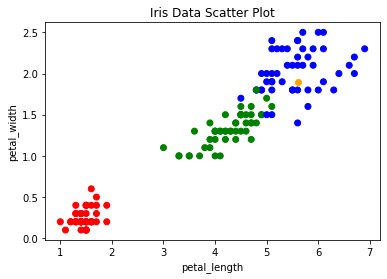

In [11]:
import matplotlib.pyplot as plt
colors = {'Iris-setosa':'red', 'Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(
    train[2], 
    train[3], 
    c=train['species'].map(colors))
plt.scatter(target[2], target[3], c='orange')
plt.xlabel(cols[2])
plt.ylabel(cols[3])
plt.title('Iris Data Scatter Plot')